# Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import squarify

In [2]:
# Load the dataset from csv file

video_games_data = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")
video_games_data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [3]:
# checking missing value
video_games_data.isnull()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,False,False,False,False,False,False,False,False,False,False,False,True,True,False
17412,False,False,False,False,False,False,False,False,False,True,True,True,True,True
17413,False,False,False,False,False,False,False,False,False,True,True,True,True,True
17414,False,False,False,False,False,False,False,False,False,True,True,True,True,True


In [4]:
# checking the number of null value
video_games_data.isnull().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

In [5]:
# **********
condition = (video_games_data['Critic_Score'].isnull()) & (video_games_data['Critic_Count'].isnull()) & (video_games_data['User_Score'].isnull()) & (video_games_data['User_Count'].isnull())&(video_games_data['Rating'].isnull())
condition

0        False
1         True
2        False
3        False
4         True
         ...  
17411    False
17412     True
17413     True
17414     True
17415     True
Length: 17416, dtype: bool

In [6]:
# **********
video_games_data = video_games_data[~condition]
video_games_data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17401,Blacksite: Area 51,PC,2007.0,Shooter,Midway Games,0.00,0.00,0.00,0.00,60.0,20.0,4.9,42.0,T
17402,Virtua Tennis 2009,PC,2009.0,Sports,Sega,0.00,0.00,0.00,0.00,68.0,8.0,6.5,19.0,E
17404,CivCity: Rome,PC,2006.0,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,67.0,46.0,6.9,32.0,E10+
17407,Super Meat Boy,PS4,2016.0,Platform,Team Meat,0.00,0.00,0.00,0.00,85.0,7.0,7.0,114.0,T


In [7]:
# **********
video_games_data.isnull().sum()

Name                  0
Platform              0
Year_of_Release       2
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       2029
Critic_Count       2029
User_Score         2567
User_Count         2567
Rating              113
dtype: int64

In [8]:
# remove missing value using dropna() function
video_games_data = video_games_data.dropna()
video_games_data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003.0,Action,Ubisoft,0.00,0.00,0.00,0.00,91.0,20.0,8.5,291.0,T
17401,Blacksite: Area 51,PC,2007.0,Shooter,Midway Games,0.00,0.00,0.00,0.00,60.0,20.0,4.9,42.0,T
17402,Virtua Tennis 2009,PC,2009.0,Sports,Sega,0.00,0.00,0.00,0.00,68.0,8.0,6.5,19.0,E
17404,CivCity: Rome,PC,2006.0,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,67.0,46.0,6.9,32.0,E10+


In [9]:
# checking the missing value again after cleaning the null data
video_games_data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64

In [10]:
# Show that there is no duplicated rows
video_games_data.duplicated().sum()

0

In [11]:
# create new column for global sales with the summation of NA sale ,Eu sale ,JP sale and other sale
video_games_data['Global_Sales'] = video_games_data['NA_Sales'] + video_games_data['EU_Sales'] + video_games_data['JP_Sales'] + video_games_data['Other_Sales']
video_games_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\3365423777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games_data['Global_Sales'] = video_games_data['NA_Sales'] + video_games_data['EU_Sales'] + video_games_data['JP_Sales'] + video_games_data['Other_Sales']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,324.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,82.0,73.0,8.3,712.0,E,35.56
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,80.0,73.0,8.0,193.0,E,32.79
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,89.0,65.0,8.5,433.0,E,29.81
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003.0,Action,Ubisoft,0.00,0.00,0.00,0.00,91.0,20.0,8.5,291.0,T,0.00
17401,Blacksite: Area 51,PC,2007.0,Shooter,Midway Games,0.00,0.00,0.00,0.00,60.0,20.0,4.9,42.0,T,0.00
17402,Virtua Tennis 2009,PC,2009.0,Sports,Sega,0.00,0.00,0.00,0.00,68.0,8.0,6.5,19.0,E,0.00
17404,CivCity: Rome,PC,2006.0,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,67.0,46.0,6.9,32.0,E10+,0.00


In [12]:
# check the data type and all the columns
video_games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Critic_Score     7112 non-null   float64
 10  Critic_Count     7112 non-null   float64
 11  User_Score       7112 non-null   float64
 12  User_Count       7112 non-null   float64
 13  Rating           7112 non-null   object 
 14  Global_Sales     7112 non-null   float64
dtypes: float64(10), object(5)
memory usage: 889.0+ KB


In [13]:
# Change 'Year_of_Release', 'Critic_Count' and 'User_Count' into Integer
video_games_data['Year_of_Release'] = video_games_data['Year_of_Release'].astype(int)
video_games_data['Critic_Count'] = video_games_data['Critic_Count'].astype(int)
video_games_data['User_Count'] = video_games_data['User_Count'].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\3080839232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games_data['Year_of_Release'] = video_games_data['Year_of_Release'].astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\3080839232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games_data['Critic_Count'] = video_games_data['Critic_Count'].astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\3080839232.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [14]:
# Reorder the columns
video_games_data = video_games_data[['Name', 'Platform', 'Year_of_Release', 
                                     'Genre','Publisher','NA_Sales','EU_Sales',
                                     'JP_Sales','Other_Sales','Global_Sales',
                                     'Critic_Score','Critic_Count','User_Score','User_Count','Rating']]

In [15]:
# rename columns
video_games_data = video_games_data.rename(columns={'Name':'Games_Name'})
video_games_data

,Games_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51,8.0,324,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.56,82.0,73,8.3,712,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.79,80.0,73,8.0,193,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65,8.5,433,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41,6.6,129,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.00,91.0,20,8.5,291,T
17401,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.00,60.0,20,4.9,42,T
17402,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.00,68.0,8,6.5,19,E
17404,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.00,67.0,46,6.9,32,E10+


In [16]:
# Data after cleaning and before filtering
video_games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Games_Name       7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   int32  
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   int32  
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   int32  
 14  Rating           7112 non-null   object 
dtypes: float64(7), int32(3), object(5)
memory usage: 805.7+ KB


In [17]:
# filter the year 
filtered_df = video_games_data[video_games_data['Year_of_Release'] >= 2000]
filtered_df

,Games_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51,8.0,324,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.56,82.0,73,8.3,712,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.79,80.0,73,8.0,193,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65,8.5,433,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41,6.6,129,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.00,91.0,20,8.5,291,T
17401,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.00,60.0,20,4.9,42,T
17402,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.00,68.0,8,6.5,19,E
17404,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.00,67.0,46,6.9,32,E10+


In [18]:
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,Games_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51,8.0,324,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.56,82.0,73,8.3,712,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.79,80.0,73,8.0,193,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65,8.5,433,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41,6.6,129,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.00,91.0,20,8.5,291,T
7025,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.00,60.0,20,4.9,42,T
7026,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.00,68.0,8,6.5,19,E
7027,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.00,67.0,46,6.9,32,E10+


In [19]:
#To view the type of platform
filtered_df['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS4', '3DS', 'X', 'PC', 'PSP',
       'WiiU', 'GC', 'GBA', 'XOne', 'PS', 'PSV', 'DC'], dtype=object)

In [20]:
# To count the type of platforms
unique_platforms = len(filtered_df['Platform'].unique())
print("Total unique platforms:", unique_platforms)

Total unique platforms: 17


In [21]:
# To view the type of genre
filtered_df['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [22]:
# To count the type of genre
unique_genres = len(filtered_df['Genre'].unique())
print("Total unique genres:", unique_genres)

Total unique genres: 12


In [23]:
# To view the publishers
filtered_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Electronic Arts', 'Bethesda Softworks',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'LucasArts', '505 Games',
       'Warner Bros. Interactive Entertainment', 'Capcom',
       'Universal Interactive', 'SquareSoft', 'RedOctane', 'Atari',
       'Eidos Interactive', 'Namco Bandai Games', 'MTV Games', 'Sega',
       'THQ', 'Disney Interactive Studios', 'Virgin Interactive',
       'Acclaim Entertainment', 'Midway Games', 'Deep Silver',
       'Vivendi Games', 'NCSoft', 'Tecmo Koei', 'Valve Software',
       'Infogrames', 'Hello Games', 'Mindscape', 'Valve', 'Global Star',
       'Gotham Games', 'Crave Entertainment', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Black Label Games', 'SouthPeak Games',
       'Zoo Digital Publishing',

In [24]:
# To count the numbers of publishers
unique_publishers = len(filtered_df['Publisher'].unique())
print("Total unique publishers:", unique_publishers)

Total unique publishers: 269


In [25]:
# To view the type of rating
filtered_df['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

In [26]:
# To count the type of rating
unique_ratings = len(filtered_df['Rating'].unique())
print("Total unique ratings:", unique_ratings)

Total unique ratings: 6


In [27]:
# To show that the years of release that we taken (2000 to 2006)
filtered_df['Year_of_Release'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2004, 2002, 2001, 2011,
       2012, 2014, 2016, 2015, 2003, 2000])

In [28]:
# To count the years that involved
year = len(filtered_df['Year_of_Release'].unique())
print("Total Year:", year)

Total Year: 17


In [29]:
# Describe command to get the statistical summary of the dataset
filtered_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000
mean,2007.578318,0.383520,0.228907,0.058540,0.081151,0.752118,70.083796,28.850761,7.162342,172.967278
std,4.112015,0.950506,0.677153,0.271898,0.266839,1.925215,13.855337,19.249797,1.442762,584.761823
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.380000,0.200000,0.010000,0.070000,0.730000,80.000000,39.000000,8.200000,87.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.540000,98.000000,113.000000,9.600000,10766.000000


In [30]:
# To show the columns
filtered_df.columns

Index(['Games_Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [31]:
filtered_df

,Games_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51,8.0,324,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.56,82.0,73,8.3,712,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.79,80.0,73,8.0,193,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65,8.5,433,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41,6.6,129,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.00,91.0,20,8.5,291,T
7025,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.00,60.0,20,4.9,42,T
7026,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.00,68.0,8,6.5,19,E
7027,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.00,67.0,46,6.9,32,E10+


# Outliers Detection

<AxesSubplot:>

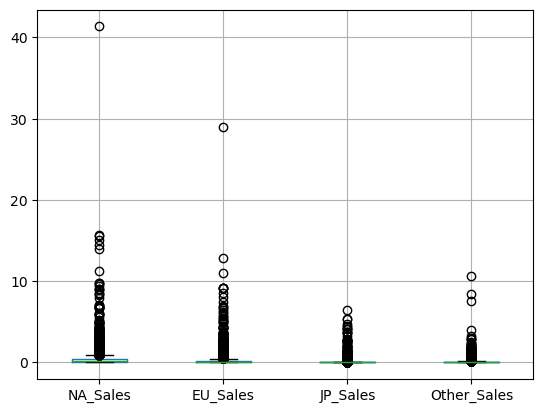

In [32]:
#Boxplot of NA_Sales, EU_Sales, JP_Sales, Other_Sales

filtered_df.boxplot(column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

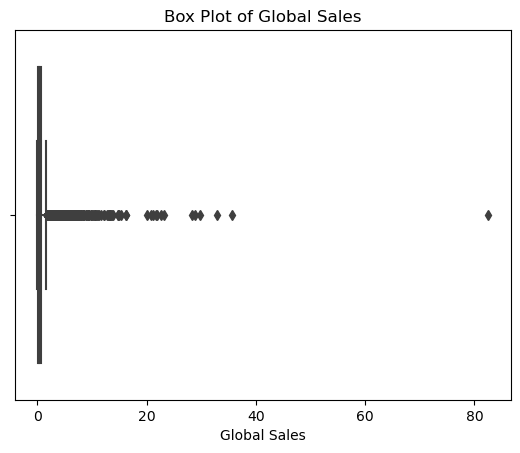

In [33]:
#  Boxplot of Global Sales
sns.boxplot(x=filtered_df['Global_Sales'])

plt.xlabel('Global Sales')
plt.title('Box Plot of Global Sales')

plt.show()

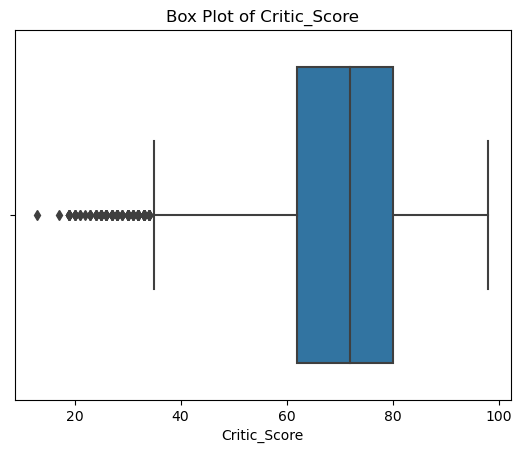

In [34]:
sns.boxplot(x=filtered_df['Critic_Score'])

plt.xlabel('Critic_Score')
plt.title('Box Plot of Critic_Score')

plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


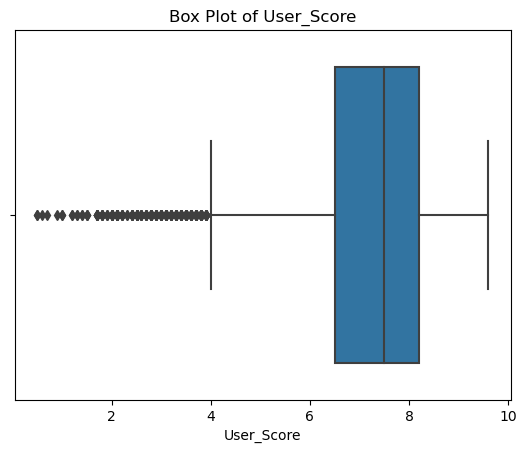

In [35]:
sns.boxplot(filtered_df['User_Score'])

plt.xlabel('User_Score')
plt.title('Box Plot of User_Score')

plt.show()

In [36]:
#Function to detect outliers
def find_outliers(filtered_df):
    q1 = filtered_df.quantile(0.25)
    q3 = filtered_df.quantile(0.75)
    IQR = q3-q1
    outliers = filtered_df[((filtered_df < (q1-1.5*IQR)) | (filtered_df > (q3+1.5*IQR)))]
    return outliers


outliers = find_outliers(filtered_df)
outliers

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\2187658908.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = filtered_df[((filtered_df < (q1-1.5*IQR)) | (filtered_df > (q3+1.5*IQR)))]


,Games_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,NaN,NaN,NaN,NaN,NaN,41.36,28.96,3.77,8.45,82.54,NaN,NaN,NaN,324.0,NaN
1,NaN,NaN,NaN,NaN,NaN,15.68,12.80,3.79,3.29,35.56,NaN,NaN,NaN,712.0,NaN
2,NaN,NaN,NaN,NaN,NaN,15.61,10.95,3.28,2.95,32.79,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,11.28,9.15,6.50,2.88,29.81,NaN,NaN,NaN,433.0,NaN
4,NaN,NaN,NaN,NaN,NaN,13.96,9.18,2.93,2.84,28.91,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.0,NaN
7025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Try to remove all the rows that are not outliers
dfs_outlier = outliers.dropna(how = 'all')
dfs_outlier

,Games_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,NaN,NaN,NaN,NaN,NaN,41.36,28.96,3.77,8.45,82.54,NaN,NaN,NaN,324.0,NaN
1,NaN,NaN,NaN,NaN,NaN,15.68,12.80,3.79,3.29,35.56,NaN,NaN,NaN,712.0,NaN
2,NaN,NaN,NaN,NaN,NaN,15.61,10.95,3.28,2.95,32.79,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,11.28,9.15,6.50,2.88,29.81,NaN,NaN,NaN,433.0,NaN
4,NaN,NaN,NaN,NaN,NaN,13.96,9.18,2.93,2.84,28.91,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,2.1,NaN,NaN
7006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
7012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,661.0,NaN
7018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4131.0,NaN


Since there are too many outliers in this situation, we will not remove them. Outliers are by definition exceptional. If, for instance, 40.52% of the data is an outlier, this really indicates that there is an interesting pattern in the data that deserves further investigation. The outliers contain all of this information such as the mean of NA_Sales, JP_Sales, EU_Sales, Other_Sales, and Global Sales are too low to determine or provide an answer to our inquiries. Therefore, outliers that continue to dominate our data are able to achieve the goals and address the issues.

# Data Preview

In [38]:
# Data that is cleaned and validated as there is no missing values and duplicate data.
video_games_dataset = filtered_df
video_games_dataset

,Games_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51,8.0,324,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.56,82.0,73,8.3,712,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.79,80.0,73,8.0,193,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65,8.5,433,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41,6.6,129,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.00,91.0,20,8.5,291,T
7025,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.00,60.0,20,4.9,42,T
7026,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.00,68.0,8,6.5,19,E
7027,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.00,67.0,46,6.9,32,E10+


# Data Description

In [39]:
video_games_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Games_Name       7029 non-null   object 
 1   Platform         7029 non-null   object 
 2   Year_of_Release  7029 non-null   int32  
 3   Genre            7029 non-null   object 
 4   Publisher        7029 non-null   object 
 5   NA_Sales         7029 non-null   float64
 6   EU_Sales         7029 non-null   float64
 7   JP_Sales         7029 non-null   float64
 8   Other_Sales      7029 non-null   float64
 9   Global_Sales     7029 non-null   float64
 10  Critic_Score     7029 non-null   float64
 11  Critic_Count     7029 non-null   int32  
 12  User_Score       7029 non-null   float64
 13  User_Count       7029 non-null   int32  
 14  Rating           7029 non-null   object 
dtypes: float64(7), int32(3), object(5)
memory usage: 741.5+ KB


In [40]:
# Export to csv file
video_games_dataset.to_csv("Video Game Dataset_Cleaned.csv")

# Data Visualization

In [41]:
# Set the plot style
sns.set_style('whitegrid')

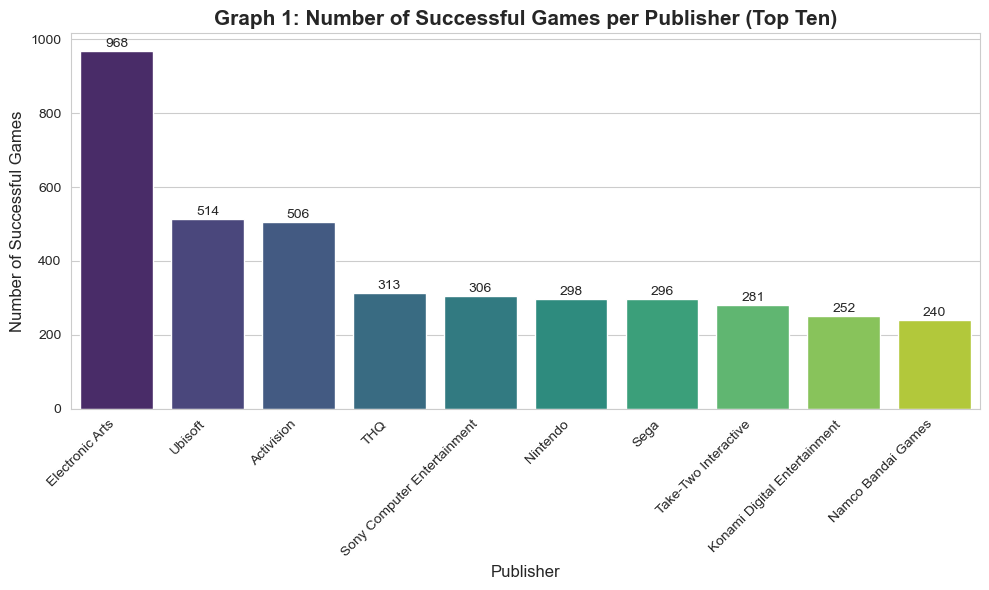

In [42]:
# Group the data by publisher and count the number of successful games
publisher_games_count = video_games_dataset.groupby('Publisher')['Games_Name'].count().reset_index()

# Sort the data in descending order of game count and select the top ten publishers
top_ten_publishers = publisher_games_count.sort_values('Games_Name', ascending=False).head(10)

# Create a bar chart to visualize the number of successful games per publisher (top ten)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Publisher', y='Games_Name', data=top_ten_publishers, palette='viridis')
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Successful Games', fontsize=12)
plt.title('Graph 1: Number of Successful Games per Publisher (Top Ten)', weight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add data labels to the bar chart
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Visualisation Interpretation:

The provided graph is a bar chart that represents the number of successful games per publisher. Each bar in the chart represents a publisher, and the height of the bar corresponds to the number of successful games released by that publisher.The graph shows the partnership opportunities related to publishers in the gaming industry. It provides insights into the number of successful games released by each publisher, helping us identify potential partnership opportunities based on their track record of success.  The top ten publishers with the highest number of successful games are shown in the graph.Top one publisher is Electronic Arts with total 968 of successful game published following by Ubisoft, Activision, THQ, Sony Computer Entertainment ,Nintendo, Sega ,Take-Two Interactive ,Konami Digital Entertainment and the Namco BAndai Games recorded the last in top ten number of successful games published. 

By analyzing the graph, The bar chart provides a clear visual comparison of the publishers at top ten, allowing us to easily identify the leading publishers in terms of the number of successful gameswe .Through this then we can identify the publishers like Electronic Art that have a strong presence in the market and a proven track record of producing successful games. It may offer promising partnership opportunities as they have demonstrated their ability to develop and publish games that resonate with the audience and user.Publishers with a large number of successful games often possess strong development teams, marketing strategies, and distribution networks. This can be valuable for our company who may benefit from the expertise and resources of these publishers for their own game development or distribution projects.This can also contribute to building trust and reputation between partner and publisher in the gaming industry at the same time.

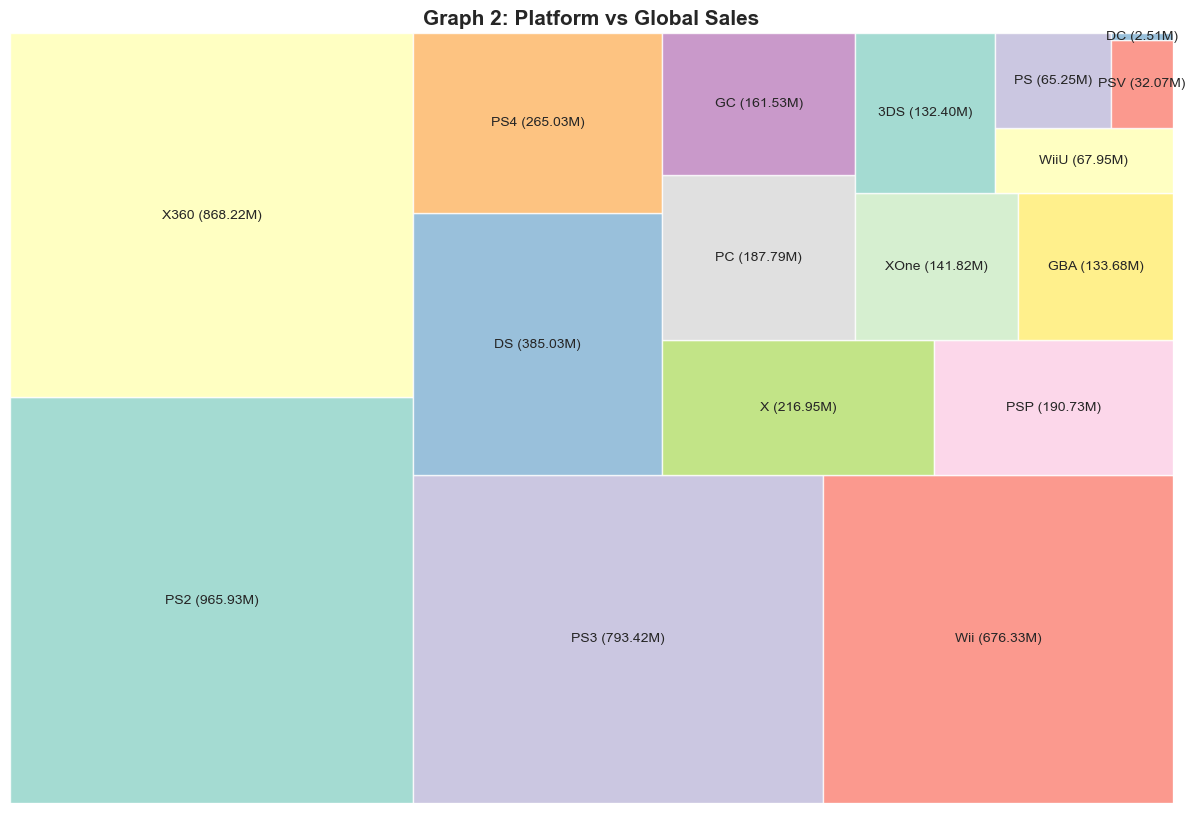

In [43]:
# Group the data by platform and calculate the total global sales for each platform
platform_sales = video_games_dataset.groupby('Platform')['Global_Sales'].sum().reset_index()


# Sort the data by global sales in descending order
platform_sales = platform_sales.sort_values('Global_Sales', ascending=False)

# Create a custom color palette with distinct colors for each platform
palette = sns.color_palette('Set3', n_colors=len(platform_sales))

# Create the treemap with custom colors and display the number of global sales on each platform
plt.figure(figsize=(15, 10))
squarify.plot(sizes=platform_sales['Global_Sales'], label=[f"{p} ({s:.2f}M)" for p, s in zip(platform_sales['Platform'], platform_sales['Global_Sales'])], color=palette, alpha=0.8,
              edgecolor='white', linewidth=1)
plt.title('Graph 2: Platform vs Global Sales', fontsize=15, fontweight='bold')
plt.axis('off')  # Turn off axis labels
plt.show()

Visualisation Interpretation: 

In the provided treemap graph, the rectangles represent different platforms in the gaming industry. The size of each rectangle corresponds to the total global sales achieved by the games released on that platform.By analyzing the treemap, we can observe the relative sizes of the platforms in terms of their global sales. The larger the rectangle, the higher the global sales for that particular platform. This provides valuable insights into the market dominance and popularity of each platform.In our graph, the biggest rectangle is PS2 with the total global sales of 965.93M. In contrast, the smallest rectangle is DC with the total global sales of 2.51M.

The treemap allows us to quickly identify the platforms with the highest global sales, which can indicate their success and market reach. These platforms like PS series including PS2, PS3 and so on can be potential partnership opportunities for the company. They have a larger share of the market and higher global sales may offer a wider audience and greater potential for collaboration or distribution agreements.For further analysis based on result of graph, we can extract few insight on Platform Dominance, Market Share Analysis and Competitive Analysis.

In the consideration of platform dominance, The treemap allows us to compare the sizes of the rectangles representing different platforms. Larger rectangles indicate platforms with higher global sales, suggesting their dominance in the market. These platforms have already established a strong presence and have a significant user base. Partnering with dominant platforms can provide access to a large audience, increasing the visibility and potential success of the company's games.

In the aspect of market share analysis,we can assess the market share of each platform. Platforms with larger rectangles have a larger share of the global sales by comparing the sizes of the rectangles, indicating their popularity and user demand. These platforms can offer attractive partnership opportunities as they have a dedicated user base that is more likely to engage with new games and content.

Lastly,the graph enables a competitive analysis of platforms. By comparing the sizes of rectangles for different platforms, the company can identify direct competitors or platforms that target similar audiences. This analysis can help in understanding the competitive landscape and identifying potential partnership opportunities that can provide a competitive edge.


In [44]:
video_games_dataset['Genre'].value_counts()

Action          1685
Sports           979
Shooter          894
Role-Playing     718
Racing           594
Platform         406
Misc             397
Fighting         383
Simulation       306
Strategy         285
Adventure        257
Puzzle           125
Name: Genre, dtype: int64

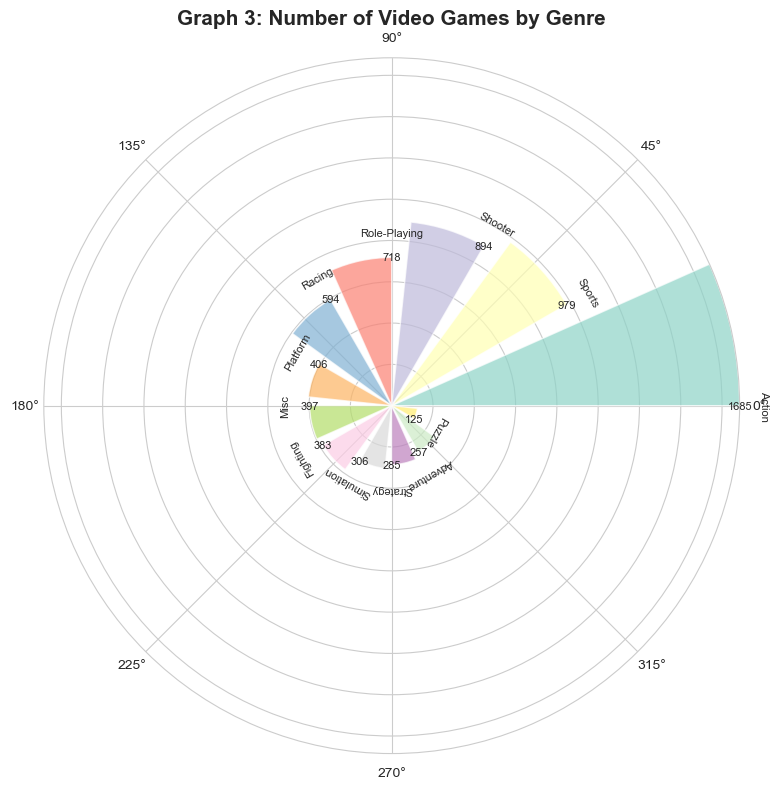

In [45]:
# Calculate the frequencies and genres
genre_counts = video_games_dataset['Genre'].value_counts()
genres = genre_counts.index
frequencies = genre_counts.values

# Create a figure and axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Set the radial axis
ax.set_ylim(0, max(frequencies))

# Calculate the bar width
bar_width = (2 * np.pi) / len(genres) * 0.8

# Define a colormap
colors = sns.color_palette('Set3', n_colors=len(genres))

# Plot the bars
bars = ax.bar(np.arange(len(genres)) * 2 * np.pi / len(genres), frequencies, width=bar_width, align='edge', alpha=0.7, color=colors)

# Add labels to the bars with improved spacing
label_offset = 120  # Adjust the offset for the genre labels
for i, (genre, freq) in enumerate(zip(genres, frequencies)):
    angle = i * 2 * np.pi / len(genres)
    ax.text(angle, freq + 1, str(freq), ha='center', va='center', fontsize=8)
    ax.text(angle, freq + label_offset, genre, ha='center', va='center', fontsize=8, rotation=angle * 180 / np.pi - 90)

# Set the title and adjust the layout
plt.title('Graph 3: Number of Video Games by Genre', fontsize=15, fontweight='bold')

# Remove radial gridlines
ax.set_yticklabels([])

# Set the aspect ratio to make the plot circular
ax.set_aspect('equal')

# Remove extra whitespace
plt.tight_layout()

# Show the chart
plt.show()

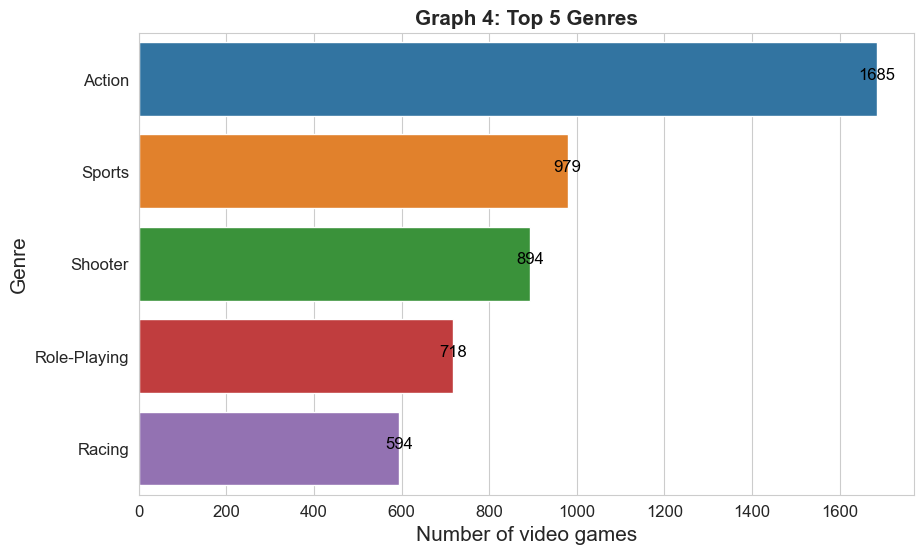

In [46]:
# Adjust the figure size
plt.figure(figsize=(10, 6))

top_genres = video_games_dataset['Genre'].value_counts().head(5)
xy = sns.barplot(y=top_genres.index, x=top_genres.values)

for i in range(5):
    value = top_genres[i]
    xy.text(x=value - 0.5, y=i, s=value, color='black', ha="center", fontsize=12)

plt.title('Graph 4: Top 5 Genres', weight='bold', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.xlabel('Number of video games', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Visualisation Interpretation: 

In the radial column chart interpretation which is graph 3, we can focus on the length of each column radiating outward from the center of the chart. The length of each column corresponds to the quantity of video games, similar to the height in the bar chart. The longer the column, the larger the number of video games in that genre.

In this graph, the top genre with the highest number of video games remains action games, indicated by the longest column. This demonstrates that action games have the most significant quantity among all the genres. Following action games, we can observe columns for sports games, shooters, role-playing games (RPG), and racing games, in descending order of the number of video games.

The popularity of action games can still be attributed to their exciting gameplay, as they provide an immersive and intense experience filled with adrenaline and engagement. The fast-paced nature of action games creates a thrilling and immersive environment for users. Additionally, the appeal of skill challenges, which require precise timing, coordination, and strategic thinking, contributes to the popularity of action games. The sense of accomplishment and motivation derived from mastering these skills make action games highly rewarding for users.

However, it's important to acknowledge that gaming preferences vary among individuals. Genres such as adventure, sports, RPG, and puzzle games also have their own unique appeal. Compared to graph 3, graph 4 makes it straightforward to observe the top 5 game genres, which include action, sports, shooting, role-playing, and racing games. Each genre's popularity is influenced by factors like technological advancements, marketing efforts, and cultural trends.

By analyzing graph 3 and graph 4, we can gain insights into the distribution and prominence of video games across different genres. The lengths of the columns allow for comparisons between genres, identification of the most and least prevalent genres, and assessment of the proportions and patterns within the dataset.

In [47]:
# To view the sum of sales of all places group by genre type
byGenre = video_games_dataset[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].groupby('Genre')
byGenre
print("\nGrouping by 'Genre' column and listing total "\
"sum of 'NA_sales,EU_sales,JP_sales,Other_sales,Global_sales (in millions)'\n", '-'*50, sep='')

byGenre.sum()


Grouping by 'Genre' column and listing total sum of 'NA_sales,EU_sales,JP_sales,Other_sales,Global_sales (in millions)'
--------------------------------------------------


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,591.66,387.17,72.89,148.91,1200.63
Adventure,38.87,25.15,8.27,8.14,80.43
Fighting,131.85,56.58,23.38,24.75,236.56
Misc,228.42,122.63,31.63,41.68,424.36
Platform,190.50,106.49,41.67,32.30,370.96
Puzzle,33.96,24.05,15.15,6.37,79.53
Racing,215.58,157.27,23.15,57.64,453.64
Role-Playing,211.55,113.64,111.31,39.41,475.91
Shooter,454.72,267.03,18.74,90.24,830.73


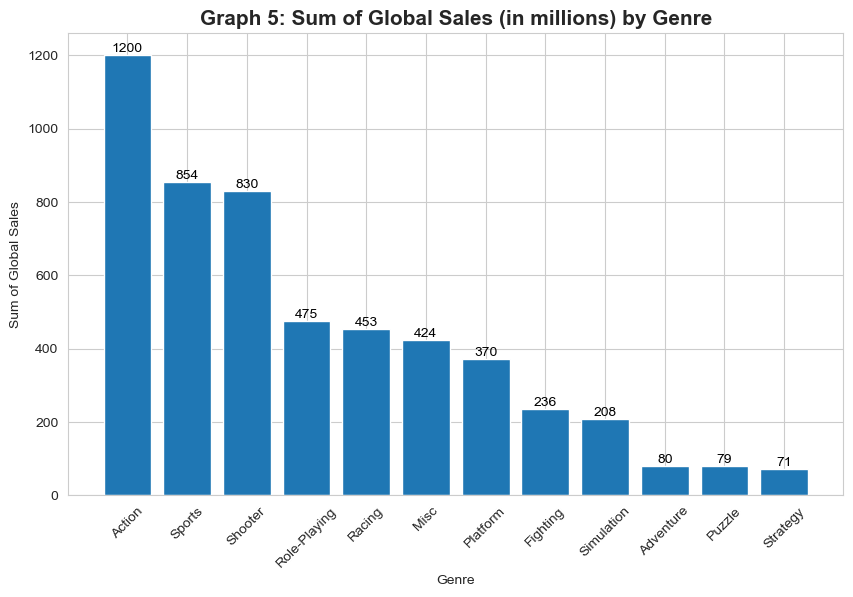

In [48]:
# Adjust the figure size
plt.figure(figsize=(10, 6))

# Calculate the sum of global sales by genre
sales_by_genre = video_games_dataset.groupby('Genre')['Global_Sales'].sum()
sales_by_genre = sales_by_genre.sort_values(ascending=False)

# Plot the bar graph
bars = plt.bar(sales_by_genre.index, sales_by_genre.values)

# Set the labels and title
plt.xlabel('Genre')
plt.ylabel('Sum of Global Sales')
plt.title('Graph 5: Sum of Global Sales (in millions) by Genre', weight='bold', fontsize=15)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add value labels on top of each bar with different colors
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black')

# Display the graph
plt.show()


Visualisation Interpretation: 

The total global sales (in millions) are shown in Graph 3 by genre. The y-axis should show the total amount of worldwide sales (in millions), with the x-axis representing various genres (such as action, adventure, and sports). The height of each bar in the graph, which represents a certain genre, corresponds to the total global sales for that genre. The graph displays worldwide video game sales according to gaming genres, which makes it easier for us to evaluate games by genre by using sales data. Through the graph, we can conclude that action games are the most well-liked by users and have the biggest total of worldwide sales when compared to other genres.

The genre with the greatest bar, representing the largest total of worldwide sales with 1200.63 million, is action. The genre with the lowest bar, representing the lowest total of global sales with 71.07 million, is strategy. Action games are quite popular because they frequently appeal to a wide range of age groups and demographics and can be found on a variety of gaming platforms, including consoles, PCs, and mobile devices. Therefore, this game genre may be the top option for game creators that are able to produce action-themed games with the highest game sales worldwide. We may examine the global sales of video games by region, such as Japan, Europe, North America, and other countries, and present the graph in the following utilising the total of video game sales by region and genres to decide which genre will make the most money from video game sales.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\3876268526.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_genre = video_games_dataset.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()


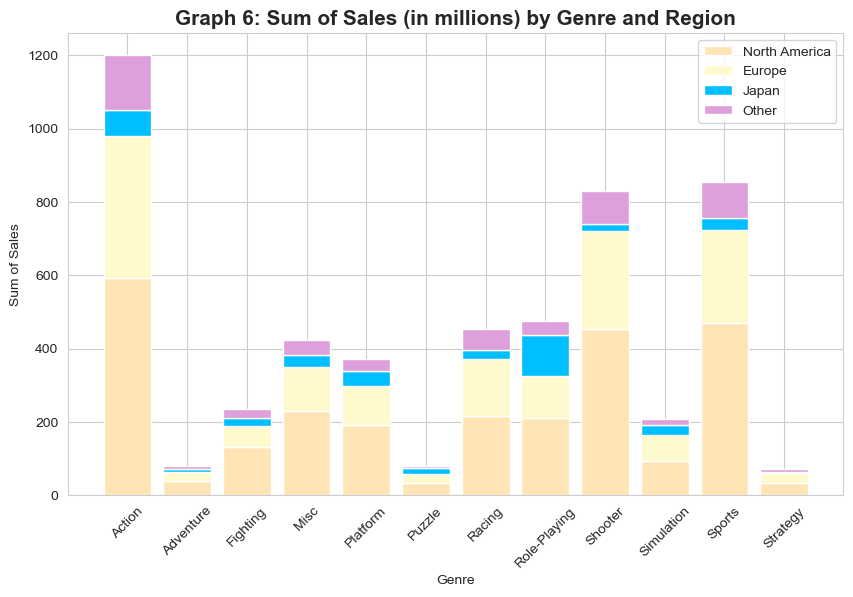

In [49]:
# Assuming 'video_games_dataset' is your DataFrame containing the data
plt.figure(figsize=(10, 6))

# Group the data by genre and calculate the sum of sales for each region
sales_by_genre = video_games_dataset.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

# Create a list of regions
regions = ['North America', 'Europe', 'Japan', 'Other']

# Create a list of colors for each region
colors = ['moccasin','lemonchiffon', 'deepskyblue', 'plum']

# Plot the stacked bar graph
plt.bar(sales_by_genre.index, sales_by_genre['NA_Sales'], label='North America', color=colors[0])
plt.bar(sales_by_genre.index, sales_by_genre['EU_Sales'], label='Europe', color=colors[1], bottom=sales_by_genre['NA_Sales'])
plt.bar(sales_by_genre.index, sales_by_genre['JP_Sales'], label='Japan', color=colors[2], bottom=sales_by_genre['NA_Sales'] + sales_by_genre['EU_Sales'])
plt.bar(sales_by_genre.index, sales_by_genre['Other_Sales'], label='Other', color=colors[3], bottom=sales_by_genre['NA_Sales'] + sales_by_genre['EU_Sales'] + sales_by_genre['JP_Sales'])

# Set the labels and title
plt.xlabel('Genre')
plt.ylabel('Sum of Sales')
plt.title('Graph 6: Sum of Sales (in millions) by Genre and Region', weight='bold', fontsize=15)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Display the graph
plt.show()

Visualisation Interpretation: 

The total sales (in millions) by genre and location are shown in Graph 4. The various genres should be represented by the x-axis, and the total global sales should be shown by the y-axis. The individual segments within each stacked bar in the graph stand in for various geographical areas (such as North America, Europe, and Japan), while each bar represents a particular genre. The height of each segment implies the contribution of each area to the overall height of the stacked bar, which represents the total amount of worldwide sales for that genre. Given that the action genre games have the largest total worldwide sales in graph 3, we will examine which geographic location has the highest sales in graph 4. 

The global sales comprise those from North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), and other countries (Other_Sales). The action genres with the highest stacked bars have the largest worldwide sales totals, whereas the startegy genres with the lowest stacked bars have the lowest totals. We are able to observe that in North America, the majority of sales of video games connected to genres occupy the half of total sales in each genre, which suggests that the majority of the sales of video games in North America are related to genres. Graph 4 demonstrates that North American sales, which reached 591.66 million dollars, accounted for fifty percent of the total sales in the action genre. Sales in the other three areas, which included sales in Europe (387.17 million dollars), Japan (72.89 million dollars), and other nations (148.91 million dollars), accounted for the remaining third. In addition, sales of shooter and sports games frequently came from North America, accounting for more than half of the total sales.

North America has a well-established and thriving gaming industry. Major console and video game producers, such as Electronic Arts, Activision Blizzard, Ubisoft, and Microsoft, are based in the region, contributing to the development and release of popular games. This does contribute to an increase in video game sales in North America. Action, sports, and first-person shooters are just a few of the genres that North America has demonstrated a great interest in, contributing to increased sales in those categories as well as showing why these three genres have significantly higher sales than other genres. Therefore, we can conclude that the majority of sales are from North America, which also has the biggest sales and the ability to make more profits than any other area.

In [50]:
# Plot a scatter plot to visualize the relationship between critic scores and user scores with colour(genres)
# Increase the maximum number of rows displayed
alt.data_transformers.disable_max_rows()

# Define the scatter plot
scatter_plot = alt.Chart(video_games_dataset).mark_circle(size=60).encode(
    x=alt.X('User_Score', scale=alt.Scale(zero=False), axis=alt.Axis(title='User Score')),
    y=alt.Y('Critic_Score', scale=alt.Scale(zero=False), axis=alt.Axis(title='Critic Score')),
    color=alt.Color('Genre', legend=alt.Legend(title='Genre')),
    tooltip=['Games_Name', 'Genre', 'Platform', 'Publisher', 'Year_of_Release', 'Critic_Score', 'User_Score']
).interactive()

# Adjust the size of the chart
scatter_plot = scatter_plot.properties(width=800, height=600,
                                       title='Graph 7: Relationship Between Critic Scores and User Scores With Genres')

# Display the scatter plot
scatter_plot

alt.Chart(...)

Visualisation Interpretation:

The scatter plot reveals a clear trend in the upper-right quadrant, indicating a positive correlation between user satisfaction and critic scores. This means that games with higher critic scores tend to have higher user scores, indicating that users generally express satisfaction with games that receive positive reviews from critics.

For example, we can observe clusters of circles representing Action, Shooting, and Role-playing games, depicted by deep blue, brown, and pink colors, respectively. These clusters are positioned above 6.0 for user scores and 50 for critic scores, indicating that these genres receive high praise from critics and tend to have higher user satisfaction.

However, there are also scattered circles, particularly in genres like Racing and Adventure, which do not follow a clear pattern. These circles are placed below 4.5 for user scores and 45 for critic scores, suggesting a lack of correlation between user satisfaction and critic scores in these games. It implies that user satisfaction for these games can vary independently of critical reception, indicating that factors other than critic reviews, such as personal preferences or gameplay mechanics, may play a significant role in determining user satisfaction.

Overall,  the scatter plot provides valuable insights into the relationship between user satisfaction and critic scores in the realm of video games. It demonstrates the overall alignment between critical reception and user sentiment, enabling game developers and enthusiasts to evaluate the influence of reviews on user satisfaction. This information can inform decisions related to game development, marketing strategies, and user engagement, ultimately aiming to enhance user satisfaction and overall gaming experiences.

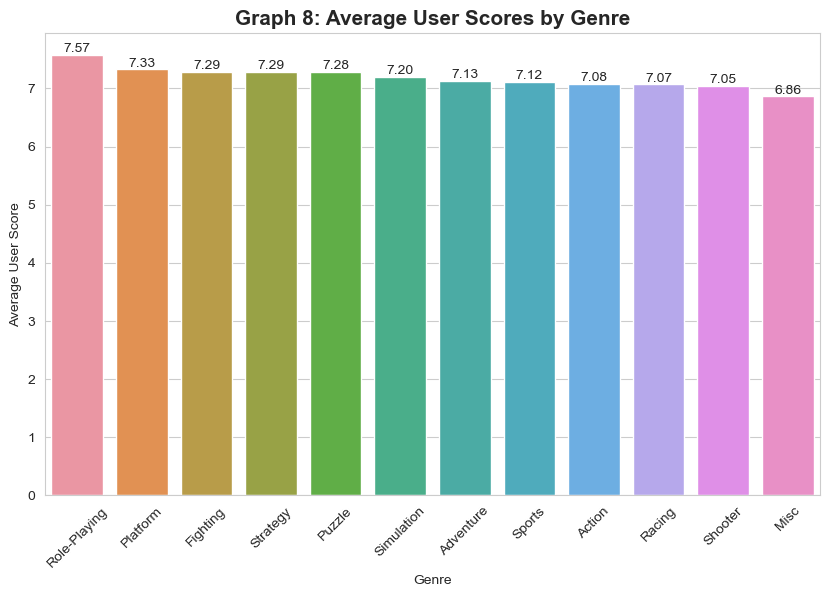

In [51]:
# Calculate the average user scores by genre
average_scores_by_genre = video_games_dataset.groupby('Genre')['User_Score'].mean()

# Sort the genres based on average user scores in descending order
average_scores_by_genre = average_scores_by_genre.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
ax = sns.barplot(x=average_scores_by_genre.index, y=average_scores_by_genre.values, order=average_scores_by_genre.index)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Average User Score')
plt.title('Graph 8: Average User Scores by Genre', weight='bold', fontsize=15)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add value annotations to the bars
for i, score in enumerate(average_scores_by_genre.values):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()


Visualisation Interpretation:

The bar plot displaying the average user scores by genre offers valuable insights into user satisfaction in the gaming industry. It provides a clear measure of user satisfaction for different genres and allows for comparisons between genres. The height of each bar represents the average user score for a specific genre. Taller bars indicate higher average user scores, indicating greater user satisfaction within those genres. Conversely, shorter bars represent lower average user scores, suggesting relatively lower user satisfaction.

In the graph above, We can observe that the overview average user scores is between 6 and 8. the Role-Playing genre stands out with the highest average user score of 7.57, indicating a high level of user satisfaction among players of role-playing games. On the other hand, the Misc genre has the lowest average user score of 6.86, suggesting comparatively lower user satisfaction within that genre.

The bar plot allows us to make comparisons across different genres, enabling us to identify genres that consistently receive high or low user satisfaction. This information is valuable for game developers and industry professionals as it helps them understand the preferences and satisfaction levels of users within each genre, allowing for informed decision-making in game development strategies, marketing efforts, and investment priorities.

Additionally, the visual representation of the bar plot makes it easy for stakeholders to interpret and understand the data. The inclusion of value annotations on each bar further enhances clarity by providing precise average user scores for each genre.

In short, the bar plot of average user scores by genre offers a comprehensive view of user satisfaction within the gaming industry. It helps us understand the varying levels of satisfaction across different genres and assists in identifying areas of improvement and potential opportunities for game developers and industry professionals. 

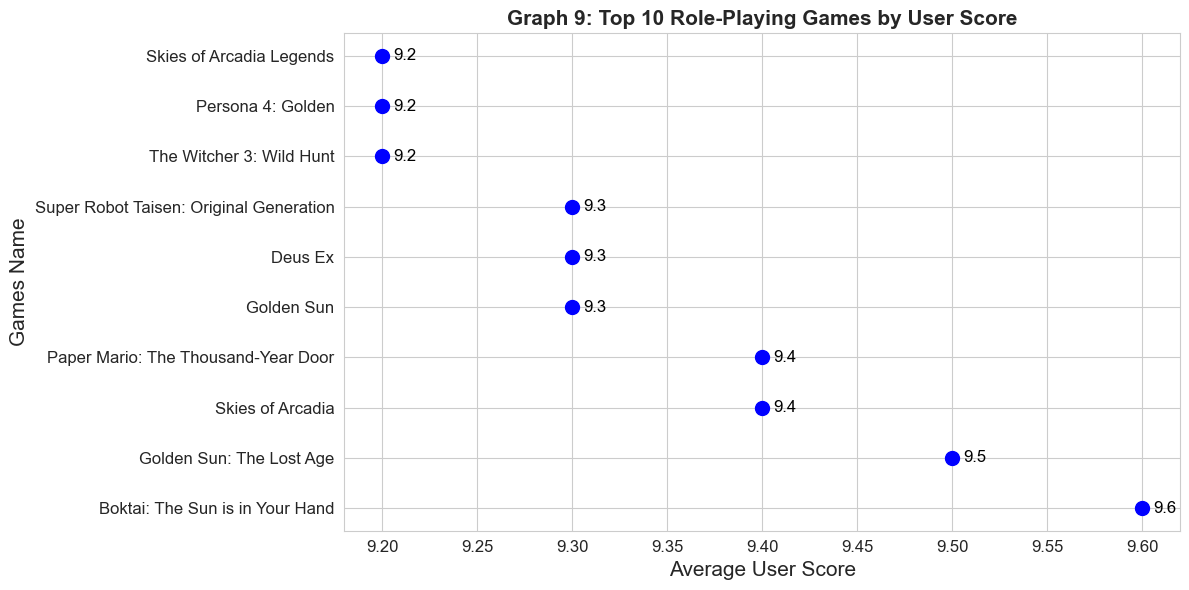

In [71]:
# Adjust the figure size
plt.figure(figsize=(12, 6))

# Filter the dataset for role-playing genre
role_playing_games = video_games_dataset[video_games_dataset['Genre'] == 'Role-Playing']

# Calculate average user scores for each game
average_user_scores = role_playing_games.groupby('Games_Name')['User_Score'].mean()

# Sort the games based on average user scores in descending order
sorted_games = average_user_scores.sort_values(ascending=False)

# Select the top 10 games
top_10_rpgames = sorted_games.head(10)

# Generate x and y values for scatter plot
x_values = top_10_rpgames.values
y_values = range(10)

# Create the scatter plot
plt.scatter(x_values, y_values, s=100, color='blue')

# Add value annotations to the points
for i, value in enumerate(x_values):
    rounded_number = round(value, 2)
    plt.text(x=rounded_number + 0.006, y=i, s=rounded_number, color='black', va='center', fontsize=12)

# Set labels and title
plt.xlabel('Average User Score', fontsize=15)
plt.ylabel('Games Name', fontsize=15)
plt.title('Graph 9: Top 10 Role-Playing Games by User Score', weight='bold', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(range(10), top_10_rpgames.index, fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

Visualisation Interpretation: 

The visualisation above depicts the top 10 Role-Playing games by users scores provides insights into the impact of reviews on user satisfaction within the role-playing genre of video games. By examining the graph, we can identify the role-playing games that have garnered the highest user satisfaction. These games have achieved overally above 9 from 0 to 10 user scores, indicating that they have received consistently positive ratings from users. Users have expressed high levels of satisfaction with these games, which contributes to their overall positive reputation within the role-playing genre.

The highest user score that is achieved by Role-Playing Games is "Boktai: The Sun is in Your Hand", which achieved 9.6 user scores compared to another Role-Playing games, following the "Golden Sun: The Lost Age", "Skies of Arcadia" and "paper Mario: The Thousand-Year Door", which are accounted to 9.5, 9.4 and 9.4 respectively among the Role-Playing games. Meanwhile, the lowest user score that are achieved in the top 10 Role-Playing games are "Skies of Arcadia Legend", "Persona 4: Golden" and "The Witcher 3: Wild Hunt", which accounted to 9.2 respectively among the top 10 Role-Playing games.

In short, this information helps players and game developers make informed decisions regarding which role-playing games are highly regarded by users and may influence their gaming choices and development strategies. Hence, this visualisation of the top 10 role-playing games by user score highlights the games that have achieved notable user satisfaction within the genre. It provides valuable insights into the preferences and opinions of users, allowing players and industry professionals to identify highly regarded role-playing games and gauge their potential impact on user satisfaction.

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

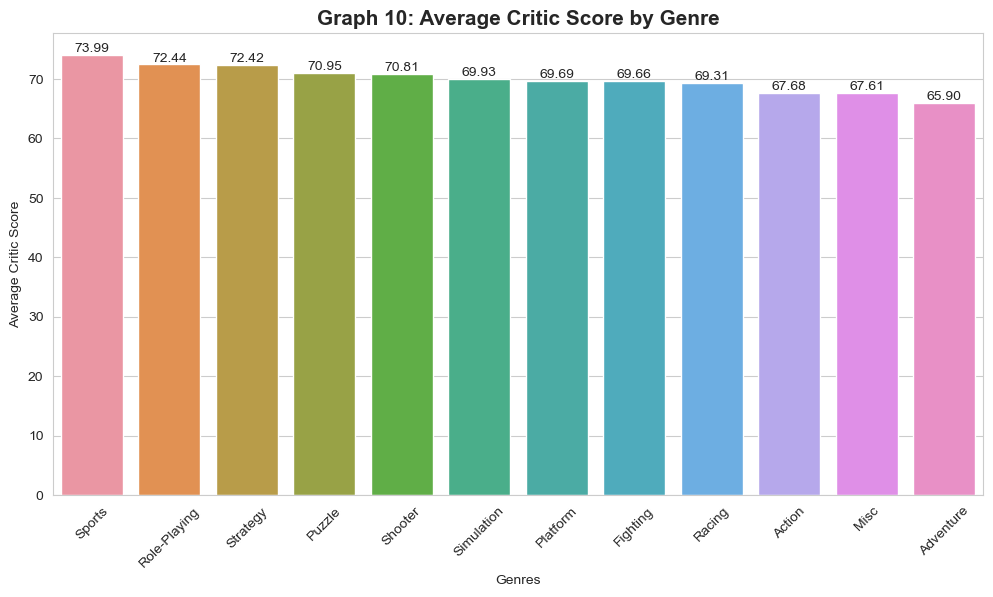

In [54]:
# Grouping the data by genre and calculating the average user score for each genre
genre_scores = video_games_dataset.groupby('Genre')['Critic_Score'].mean()

# Sort the ratings by average user score in descending order
genre_scores = genre_scores.sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_scores.index, y=genre_scores.values, order=genre_scores.index)
plt.xlabel('Genres')
plt.ylabel('Average Critic Score')
plt.title('Graph 10: Average Critic Score by Genre', weight='bold', fontsize=15)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Add value annotations to the bars
for i, score in enumerate(genre_scores.values):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

Visualisation Interpretation: 

The bar plot showcasing the average critic scores by genre provides insights into the impact of critic reviews on user satisfaction within the gaming industry. We can see that the graph is shown the several genres had achieved overally from 65 to 75 critic scores.

For instance, we observe that the Sports genre has the highest average critic score, indicated by the tallest bar with average 73.99 critic score compared to another genres, it suggests that Sports games have received significant critical acclaim. This implies that users who enjoy role-playing games are more likely to find satisfaction in this genre, as it consistently receives positive reviews from critics. It highlights the correlation between positive critic reception and user satisfaction within the Sports genre games.

On the other hand, if we notice that the Adventure genre has a lower average critic score, represented by a shorter bar with average 65.90 critic score among the games' genres, it indicates a relatively lower level of critical acclaim for Adventure games. This suggests that users who are interested in Adventure games might find less overall satisfaction within this genre, as it has received comparatively less positive recognition from critics.

By understanding the relationship between critic scores and user satisfaction within each genre, game developers and industry professionals can gain insights into user preferences and make informed decisions regarding game development, marketing strategies, and investment priorities. It serves as a valuable tool for assessing the impact of critic reviews on user satisfaction and shaping the future of the gaming industry.

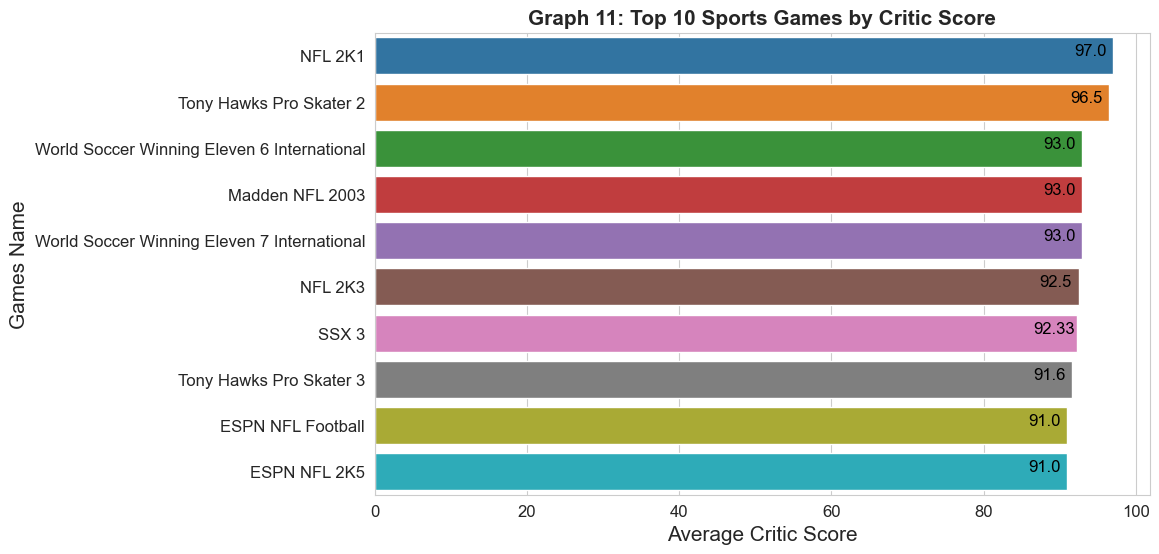

In [55]:
# Adjust the figure size
plt.figure(figsize=(10, 6))

# Filter the dataset for sports genre
sports_games = video_games_dataset[video_games_dataset['Genre'] == 'Sports']

# Calculate average critic scores for each game
average_critic_scores = sports_games.groupby('Games_Name')['Critic_Score'].mean()

# Sort the games based on average critic scores in descending order
sorted_games = average_critic_scores.sort_values(ascending=False)

# Select the top 10 games
top_10_sgames = sorted_games.head(10)

xy = sns.barplot(y=top_10_sgames.index, x=top_10_sgames.values)

for i in range(10):
    value = top_10_sgames[i]
    rounded_number = round(value, 2)
    xy.text(x=rounded_number - 3, y=i, s=rounded_number, color='black', ha="center", fontsize=12)

plt.title('Graph 11: Top 10 Sports Games by Critic Score', weight='bold', fontsize=15)
plt.ylabel('Games Name', fontsize=15)
plt.xlabel('Average Critic Score', fontsize=15)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Visualisation Interpretation: 

The bar plot depicting the top 10 sports games by critic score provides insights into the impact of critic reviews on user satisfaction within the sports genre of video games. By examining the lengths of the bars, we can assess the level of critical acclaim associated with each game that has achieved average score from 90 to 100. Games with longer bars indicate higher average critic scores, suggesting greater recognition and positive reception from critics. This implies that these sports games have been well-received and highly praised by critics in terms of their quality, gameplay, and overall experience.

In this case, we observe the highest user score that is achieved by Sports Games is "NFL 2K1", which achieved 97 critic scores compared to another Sports Games. It suggests that this particular Sports Game has received a high average critic score, indicating a strong critical endorsement. This positive reception can potentially translate into higher user satisfaction as users often consider critic reviews when making decisions about which games to play. On the other hand, the lowest user score that is achieved in the top 10 Sports games are "ESPN NFL Football" and "ESPN NFL 2K5", which accounted to 91 critic scores among the top 10 Sports games.

Moreover, we can also see the NFL series and Soccer series games achieved the average high critic score to provide valuable insights for both users and game developers. Users who enjoy sports games can use this information as a reference to discover highly regarded titles within the genre, which may increase their likelihood of finding games that align with their preferences and provide a satisfying gameplay experience. Similarly, game developers and industry professionals can analyze the top-performing sports games in terms of critic scores to understand the elements and features that contribute to higher user satisfaction. This information can guide their decision-making process in terms of game development, marketing strategies, and investments in the sports genre.

In short, the bar plot of top 10 sports games by critic score offers a glimpse into the impact of critic reviews on user satisfaction within the sports genre. It highlights the games that have garnered critical acclaim, indicating their potential to provide enjoyable experiences and high satisfaction levels for users interested in sports games.